In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

In [2]:
sns.set_style('whitegrid')

Download the dataset here:

https://www.kaggle.com/datasets/jjayfabor/lettuce-growth-days?resource=download

In [3]:
df = pd.read_csv('./data/baby_names.csv')

In [4]:
df

,Name,Sex,Count,Year
0,Emily,F,25735,1997
1,Jessica,F,21044,1997
2,Ashley,F,20895,1997
3,Sarah,F,20712,1997
4,Hannah,F,20594,1997
...,...,...,...,...
2052776,Zymire,M,5,2008
2052777,Zyquarius,M,5,2008
2052778,Zyquavion,M,5,2008
2052779,Zyrell,M,5,2008


In [5]:
df.query('Year == 2021').sort_values('Count')

,Name,Sex,Count,Year
1551257,Diamante,F,5,2021
1552101,Louiza,F,5,2021
1552100,Louisiana,F,5,2021
1552099,Louann,F,5,2021
1552098,Louana,F,5,2021
...,...,...,...,...
1553035,Oliver,M,14616,2021
1535490,Emma,F,15433,2021
1535489,Olivia,F,17728,2021
1553034,Noah,M,18739,2021


In [6]:
df_girls = df.query('(Name == "Olivia") and (Sex == "F")')
df_boys = df.query('(Name == "Liam") and (Sex == "M")')

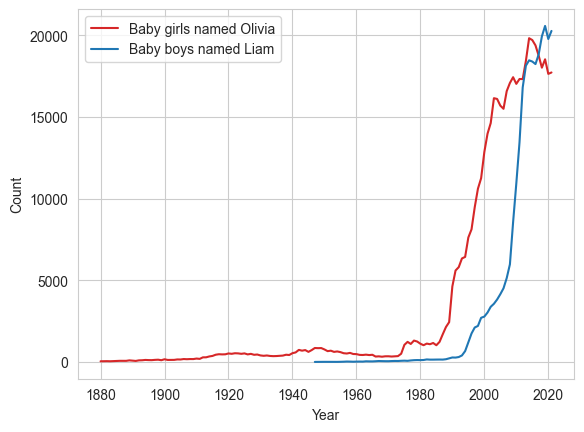

In [7]:
sns.lineplot(data=df_girls, x='Year', y='Count', label='Baby girls named Olivia', color='C3')
sns.lineplot(data=df_boys, x='Year', y='Count', label='Baby boys named Liam', color='C0')

plt.savefig('./plots/2023-10-20_baby_names_popular.png', dpi=150, bbox_inches='tight')

In [8]:
years = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
boys = []
girls = []

for y in years:
    df_count = df.query(f'(Count > 10000) and (Year == {y})')
    vc = df_count['Sex'].value_counts()
    boys.append(vc['M'])
    girls.append(vc['F'])
    print(vc)

M    45
F    37
Name: Sex, dtype: int64
M    37
F    31
Name: Sex, dtype: int64
M    40
F    28
Name: Sex, dtype: int64
M    47
F    31
Name: Sex, dtype: int64
M    37
F    23
Name: Sex, dtype: int64
M    35
F    12
Name: Sex, dtype: int64
M    11
F     8
Name: Sex, dtype: int64


In [9]:
new_df = pd.DataFrame(dict(years=years, boys=boys, girls=girls))
new_df.melt(id_vars='years')

,years,variable,value
0,1960,boys,45
1,1970,boys,37
2,1980,boys,40
3,1990,boys,47
4,2000,boys,37
5,2010,boys,35
6,2020,boys,11
7,1960,girls,37
8,1970,girls,31
9,1980,girls,28


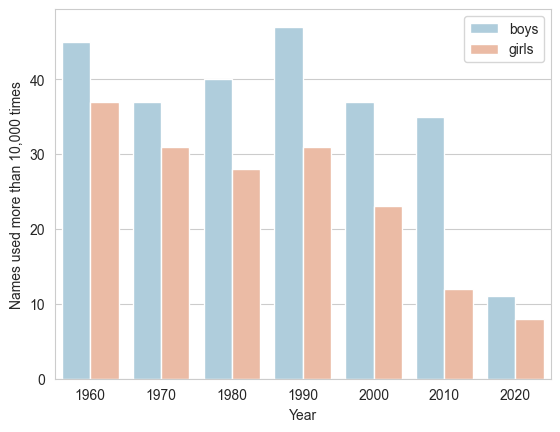

In [10]:
sns.barplot(data=new_df.melt(id_vars='years'), x='years', y='value', hue='variable', palette='RdBu_r')
ax=plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Names used more than 10,000 times')
ax.legend()

plt.savefig('./plots/2023-10-20_baby_names_10k.png', dpi=150, bbox_inches='tight')

In [11]:
df['Decade'] = (df['Year'] // 10) * 10
girls=[]
boys=[]

decades = ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

In [12]:
for d in decades:
    print(d)
    tmp = df.query(f'(Decade == {d}) and (Sex == "F")').groupby(['Decade', 'Name'])['Count'].sum().sort_values().reset_index().iloc[-1]['Name']
    girls.append(tmp)
    tmp = df.query(f'(Decade == {d}) and (Sex == "M")').groupby(['Decade', 'Name'])['Count'].sum().sort_values().reset_index().iloc[-1]['Name']
    boys.append(tmp)

1940
1950
1960
1970
1980
1990
2000
2010
2020


In [13]:
new_df = pd.DataFrame(dict(decade=decades, girls=girls, boys=boys))

In [14]:
new_df

,decade,girls,boys
0,1940,Mary,James
1,1950,Mary,James
2,1960,Lisa,Michael
3,1970,Jennifer,Michael
4,1980,Jessica,Michael
5,1990,Jessica,Michael
6,2000,Emily,Jacob
7,2010,Emma,Noah
8,2020,Olivia,Liam


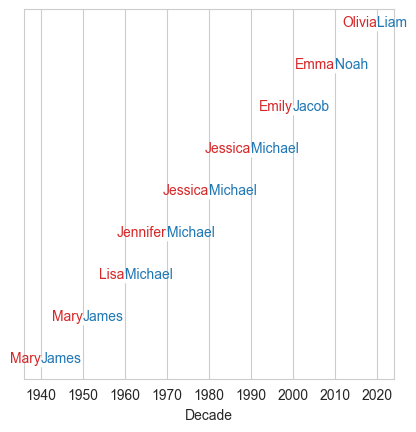

In [15]:
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')

for dec in decades:
    tmp = new_df.query('decade == @dec')

    ax.scatter(tmp['decade'].values, tmp['decade'].values, color='white')
    ax.text(tmp['decade'].values, tmp['decade'].values, tmp['girls'].values[0], color='C3', ha='right')
    ax.text(tmp['decade'].values, tmp['decade'].values, tmp['boys'].values[0], color='C0', ha='left')
    
ax.set_yticks([])
ax.set_xlabel('Decade')

plt.savefig('./plots/2023-10-20_baby_names_decades.png', dpi=150, bbox_inches='tight')

In [16]:
## Unpopular baby names

In [28]:
tmp = df.query('(Year == 2021) and (Sex == "F")').sort_values('Count')
tmp.describe()

,Count,Year,Decade
count,17544.000000,17544.0,17544.0
mean,92.743844,2021.0,2020.0
std,490.617046,0.0,0.0
min,5.000000,2021.0,2020.0
25%,7.000000,2021.0,2020.0
50%,12.000000,2021.0,2020.0
75%,32.000000,2021.0,2020.0
max,17728.000000,2021.0,2020.0


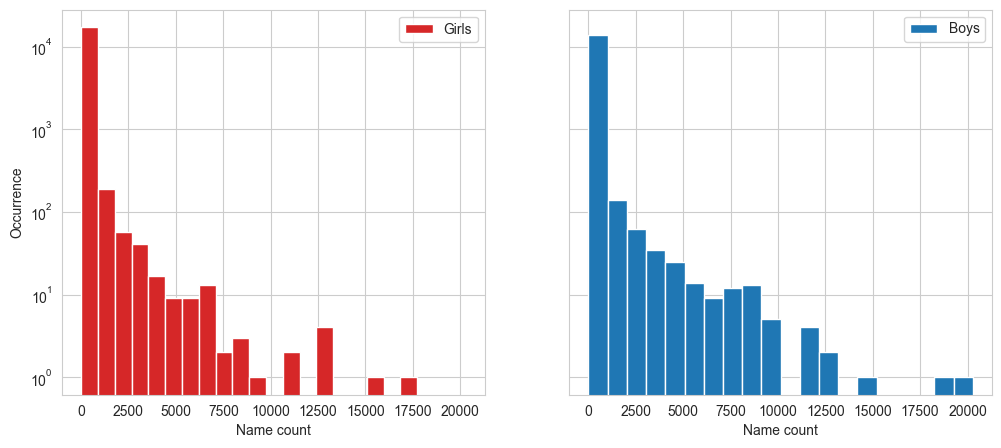

In [38]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))

tmp = df.query('(Year == 2021) and (Sex == "F")').sort_values('Count')
ax[0].hist(tmp['Count'].values, bins=20, log=True, label='Girls', color='C3')
tmp = df.query('(Year == 2021) and (Sex == "M")').sort_values('Count')
ax[1].hist(tmp['Count'].values, bins=20, log=True, label='Boys', color='C0')

ax[0].legend()
ax[1].legend()

ax[0].set_xlabel('Name count')
ax[1].set_xlabel('Name count')

ax[0].set_ylabel('Occurrence')


plt.savefig('./plots/2023-12-01_dist_2021.png', dpi=150, bbox_inches='tight')

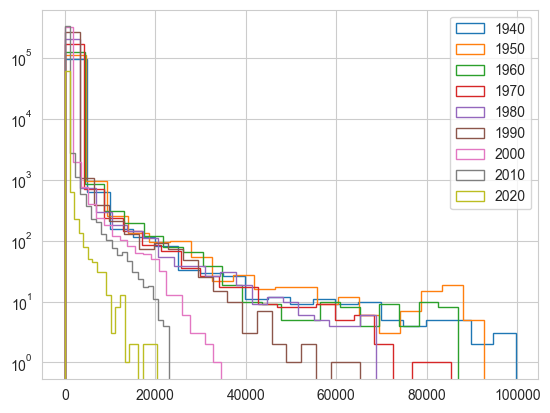

In [53]:
fig, ax = plt.subplots(1, 1)

for decade in decades:
    tmp = df.query(f'(Decade == {decade})').sort_values('Count')
    ax.hist(tmp['Count'].values, bins=20, log=True, label=decade, histtype='step')


ax.legend()
plt.savefig('./plots/2023-12-01_dist_2021_1960.png', dpi=150, bbox_inches='tight')

In [54]:
df

,Name,Sex,Count,Year,Decade
0,Emily,F,25735,1997,1990
1,Jessica,F,21044,1997,1990
2,Ashley,F,20895,1997,1990
3,Sarah,F,20712,1997,1990
4,Hannah,F,20594,1997,1990
...,...,...,...,...,...
2052776,Zymire,M,5,2008,2000
2052777,Zyquarius,M,5,2008,2000
2052778,Zyquavion,M,5,2008,2000
2052779,Zyrell,M,5,2008,2000


In [57]:
girls=[]
boys=[]

for d in decades:
    print(d)
    tmp = df.query(f'(Decade == {d}) and (Sex == "F")').groupby(['Decade', 'Name'])['Count'].sum().sort_values().reset_index().iloc[0]['Name']
    girls.append(tmp)
    tmp = df.query(f'(Decade == {d}) and (Sex == "M")').groupby(['Decade', 'Name'])['Count'].sum().sort_values().reset_index().iloc[0]['Name']
    boys.append(tmp)

1940
1950
1960
1970
1980
1990
2000
2010
2020


In [58]:
new_df = pd.DataFrame(dict(decade=decades, girls=girls, boys=boys))

In [59]:
new_df

,decade,girls,boys
0,1940,Merel,Jerrill
1,1950,Fonnie,Zyndall
2,1960,Pauli,Damaris
3,1970,Latawn,Aakash
4,1980,Corona,Shaddy
5,1990,Aailiyah,Jehremy
6,2000,Aabriella,Zyvion
7,2010,Arvi,Kiernen
8,2020,Maveryk,Eliasjames


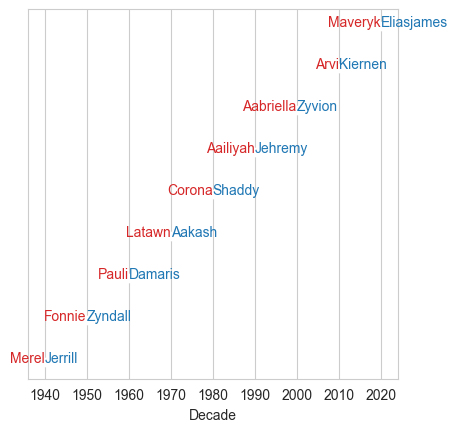

In [60]:
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')

for dec in decades:
    tmp = new_df.query('decade == @dec')

    ax.scatter(tmp['decade'].values, tmp['decade'].values, color='white')
    ax.text(tmp['decade'].values, tmp['decade'].values, tmp['girls'].values[0], color='C3', ha='right')
    ax.text(tmp['decade'].values, tmp['decade'].values, tmp['boys'].values[0], color='C0', ha='left')
    
ax.set_yticks([])
ax.set_xlabel('Decade')

plt.savefig('./plots/2023-12-01_baby_names_decades.png', dpi=150, bbox_inches='tight')